## TRIP ADVISOR

In [32]:
 # %pip install selenium
 # %pip install webdriver-manager
 # %pip install seaborn 
 # %pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [34]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.support.wait import WebDriverWait
from datetime import datetime

import time
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#### Armani Hotel Milano

In [8]:
# get browser, maximise window, open web page
browser = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
browser.maximize_window()
browser.get('https://www.tripadvisor.com/Hotel_Review-g187849-d2340336-Reviews-Armani_Hotel-Milan_Lombardy.html')

In [9]:
# wait for cookies button, click accept
cookies_wait = WebDriverWait(browser, timeout=3)
cookies_accept = cookies_wait.until(lambda b: b.find_element('xpath', '//*[@id="onetrust-accept-btn-handler"]'))
cookies_accept.click()

In [10]:
expand = browser.find_element('xpath',"//div[contains(@data-test-target, 'expand-review')]")
if expand:
    expand.click()

In [11]:
reviews = browser.find_elements('xpath', ".//div[@data-reviewid]")
reviews


[<selenium.webdriver.remote.webelement.WebElement (session="1d942bc05bb0f8ed50f851d8f5eb848b", element="58ED4B0489078BA226026B5F0D309D3D_element_53")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1d942bc05bb0f8ed50f851d8f5eb848b", element="58ED4B0489078BA226026B5F0D309D3D_element_54")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1d942bc05bb0f8ed50f851d8f5eb848b", element="58ED4B0489078BA226026B5F0D309D3D_element_55")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1d942bc05bb0f8ed50f851d8f5eb848b", element="58ED4B0489078BA226026B5F0D309D3D_element_56")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1d942bc05bb0f8ed50f851d8f5eb848b", element="58ED4B0489078BA226026B5F0D309D3D_element_57")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1d942bc05bb0f8ed50f851d8f5eb848b", element="58ED4B0489078BA226026B5F0D309D3D_element_58")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1d942bc05bb0f8ed50f851d8f5eb

In [12]:
try:
    with open('ArmaniHotelReviews.csv', 'w', encoding="utf-8") as csvFile:
        csvWriter = csv.writer(csvFile)

        for i in range(10): #loop 10 page
            time.sleep(2)


            reviews = browser.find_elements('xpath', ".//div[@data-reviewid]")

            for review in reviews:
                rating_bubble = review.find_element('xpath', ".//span[contains(@class, 'ui_bubble_rating bubble_')]")
                score = rating_bubble.get_attribute("class").split("_")[3]

                date_obj = review.find_element('xpath', ".//span[@class='teHYY _R Me S4 H3']")
                date_rec = date_obj.text.replace("Date of stay: ",'')
                date = datetime.strptime(date_rec, '%B %Y')

                title = review.find_element('xpath', ".//div[contains(@data-test-target, 'review-title')]").text

                comment = review.find_element('xpath', ".//span[@class='QewHA H4 _a']").text.replace("\n", " ")
                csvWriter.writerow([score, date.year, date.month, title, comment])
            
            browser.find_element('xpath', './/a[@class="ui_button nav next primary "]').click()
finally:
    browser.quit()

In [26]:
df=pd.read_csv("ArmaniHotelReviews.csv", names=["score", "year", "month", "title", "comment"])

In [27]:
df.head()

,score,year,month,title,comment
0,50,2023,8,EB,"Everything is fine, except for the cold feel o..."
1,30,2023,7,First class team,The team at the Armani were amongst the best I...
2,50,2023,7,Modernist Milano,The Armani is a strikingly modern hotel in the...
3,50,2023,6,Modern luxurious stay with very friendly staff,We stayed in this hotel for 5 nights to explor...
4,50,2023,5,Better than heaven a true testament of Armani ...,No question this is the only place to stay in ...


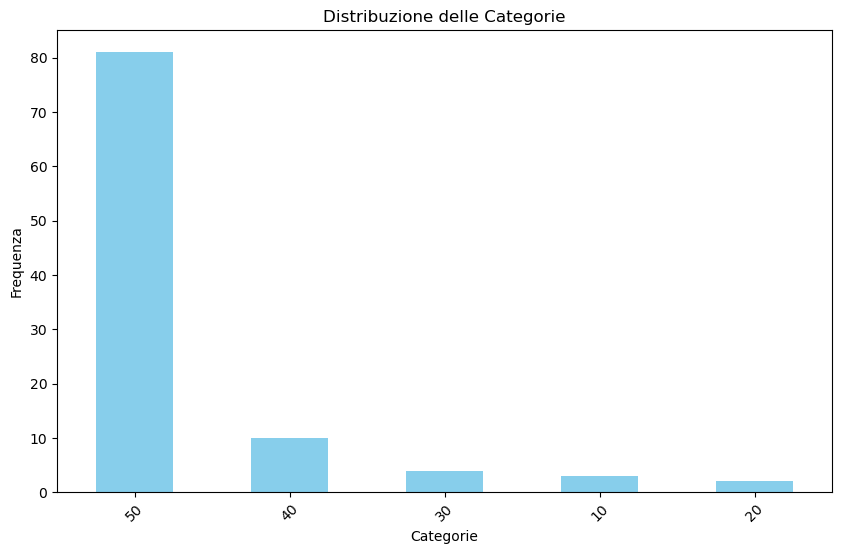

In [28]:



# Conta le occorrenze di ciascuna categoria nella seconda colonna
conteggio_categorie = df.iloc[:, 0].value_counts()

# Crea un grafico a barre per visualizzare le categorie
plt.figure(figsize=(10, 6))
conteggio_categorie.plot(kind='bar', color='skyblue')
plt.title('Distribuzione delle Categorie')
plt.xlabel('Categorie')
plt.ylabel('Frequenza')
plt.xticks(rotation=45)
plt.show()


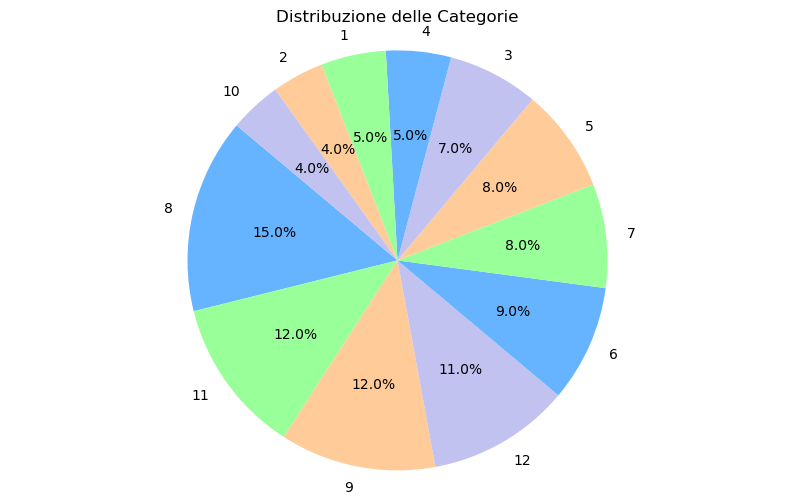

In [29]:


# Conta le occorrenze di ciascuna categoria nella seconda colonna
conteggio_categorie = df.iloc[:, 2].value_counts()

# Crea un grafico a torta per visualizzare le categorie
plt.figure(figsize=(10, 6))
plt.pie(conteggio_categorie, labels=conteggio_categorie.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Distribuzione delle Categorie')
plt.axis('equal')  # Garantisce che il grafico sia un cerchio
plt.show()


In [30]:
df

,score,year,month,title,comment
0,50,2023,8,EB,"Everything is fine, except for the cold feel o..."
1,30,2023,7,First class team,The team at the Armani were amongst the best I...
2,50,2023,7,Modernist Milano,The Armani is a strikingly modern hotel in the...
3,50,2023,6,Modern luxurious stay with very friendly staff,We stayed in this hotel for 5 nights to explor...
4,50,2023,5,Better than heaven a true testament of Armani ...,No question this is the only place to stay in ...
...,...,...,...,...,...
95,50,2018,12,SPA - Beautiful experience,"We really enjoyed the spa at Armani hotel, fri..."
96,50,2018,12,Beautiful hotel and superb service especially ...,We had a great time at Armani hotel in 304. Th...
97,50,2018,12,Excellent property....but scope of improvement...,It’s an excellent property. Very well located ...
98,50,2018,12,Amazing Hotel,"The hotel is really great. Design, Atmosphere,..."


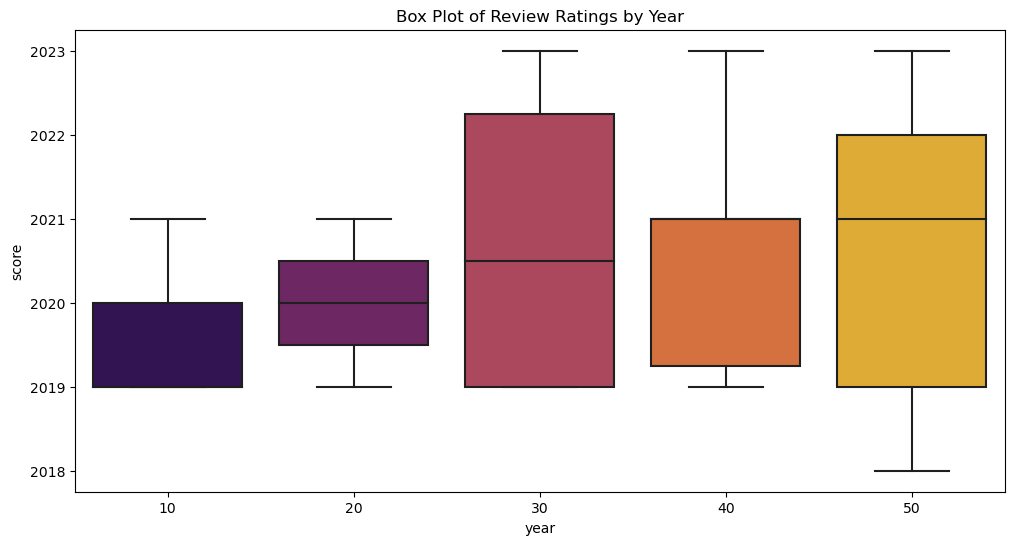

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='score', y='year', palette='inferno')
plt.xlabel('year')
plt.ylabel('score')
plt.title('Box Plot of Review Ratings by Year')
plt.show()

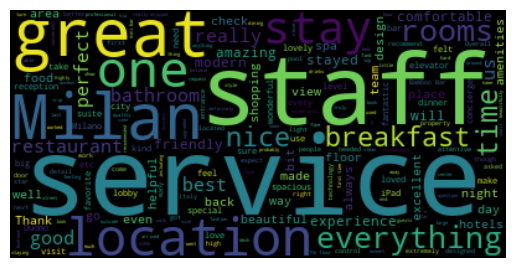

In [39]:
stopwords = set(STOPWORDS)
stopwords.update(['armani','hotel','room'])
reviews = " ".join(review for review in df.comment)
wordcloud = WordCloud(stopwords=stopwords).generate(reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\ChristianSandi\AppData\Local\Temp\ipykernel_30916\447474375.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


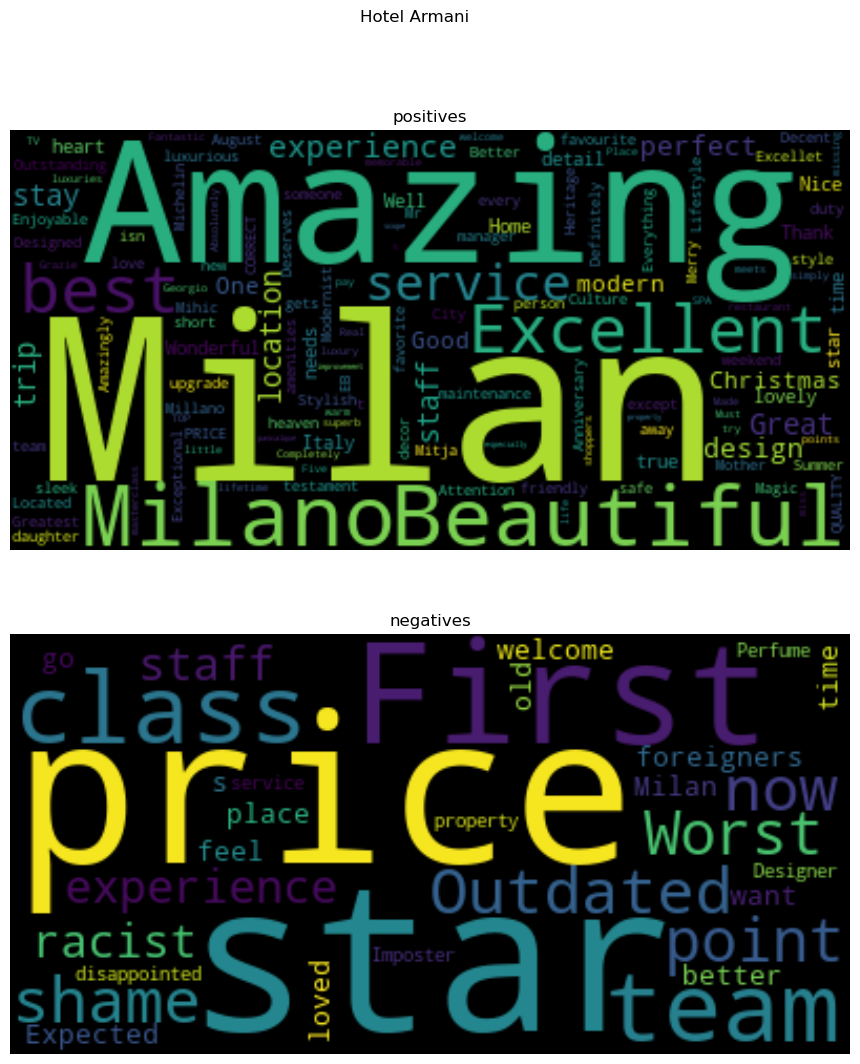

In [48]:
df['sentiment'] = df['score'].apply(lambda score : +1 if score > 30 else -1)
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

pos = " ".join(review for review in positive.title)
wordcloud_pos = WordCloud(stopwords=stopwords).generate(pos)
neg = " ".join(review for review in negative.title)
wordcloud_neg = WordCloud(stopwords=stopwords).generate(neg)


fig, axes = plt.subplots(2,1,figsize=(12,12))
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title('positives')
axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title('negatives')
fig.suptitle("Hotel Armani")
fig.show()

